<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Executive-Summary" data-toc-modified-id="Executive-Summary-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Executive Summary</a></span></li></ul></li><li><span><a href="#Data-Import-and-Cleaning" data-toc-modified-id="Data-Import-and-Cleaning-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Import and Cleaning</a></span><ul class="toc-item"><li><span><a href="#Initial-Analysis-and-Renaming" data-toc-modified-id="Initial-Analysis-and-Renaming-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Initial Analysis and Renaming</a></span><ul class="toc-item"><li><span><a href="#Initial-Analysis" data-toc-modified-id="Initial-Analysis-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Initial Analysis</a></span></li><li><span><a href="#Column-Re-naming" data-toc-modified-id="Column-Re-naming-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Column Re-naming</a></span></li></ul></li><li><span><a href="#Remove-rows-with-suspected-data-missing-completely-at-random-in-the-train-dataset" data-toc-modified-id="Remove-rows-with-suspected-data-missing-completely-at-random-in-the-train-dataset-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Remove rows with suspected data missing completely at random in the train dataset</a></span></li></ul></li></ul></div>

# Project 2: Predicting Ames, Iowa Housing Prices

## Introduction

In this project, our objective is to is to develop a model to predict the selling price of a given home in Ames, Iowa from the given datasets. This information can then be used for real estate and relevant industry to make predictions on the value of a home within Ames.

Our selected model performs well with with a root mean squared error (RMSE) of \\$30,000 on a dataset with a mean of \\$181,000.

### Executive Summary

Our process is summarized as such:
1. Train and test set data is cleaned with rows of missing data either removed or imputed.
2. Ordinal categorical data is put into a scalar numeric form in-line with its impact.
3. Nominal categorical data is dummified with cardinalities with low representation merged (10% of all data have their cardinalities merged into an 'others' category where appropriate)
4. Linear, Ridge and Lasso regression models are produced and compared to decide on which has the best results.

We have found that house prices are best prediced by its indoor area and features (number of rooms, fireplaces, etc.), age of the property, and quality metrics available in the dataset. Adjacent features (its surrounding area and amenities) and open areas (porches) do not contribute to price as much.

Our report could have been improved with better information on each home's location (their address) and information on when these sales prices were published. Time of sale affects the variability of the results significantly. For example, if these sales were made in an economic boom, sale price would be largely inflated. Conversely, in a recession, they would be deflated.


## Data Import and Cleaning

In this section we will aim to:
1. Clean up data and prepare it for EDA and Feature Engineering.
2. Understand data with the help of the data dictionary and outside research.
3. Plan directive for the rest of the data science project.

In [1]:
# Import necessary APIs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_rows", 101)

%matplotlib inline

In [2]:
# Import all text files
train = pd.read_csv('../datasets/train.csv')
test = pd.read_csv('../datasets/test.csv')

### Initial Analysis and Renaming

Let's have a look at the data and try to understand it.

In [3]:
train.head(5)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
test.head(5)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [5]:
test.dtypes

Id                   int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1         int64
BsmtFin Type 2      object
B

In [6]:
# Preview column types
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

Let's also take a quick look at our target variable.

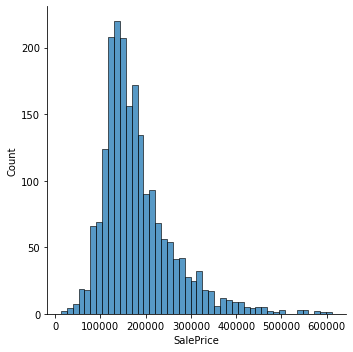

In [7]:
sns.displot(train['SalePrice'])

In [8]:
train['SalePrice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

#### Initial Analysis
We see that the data in our train and test sets have a mixture of continuous and categorical data. Of the categorical data, many are ordinal in nature. We also observe that several columns have a large number of NaN values.

The number of predictors is very large, indicating that several could be aggregations or co-dependant upon other predictors in the dataset. Our first objective in the EDA section will be to reduce the number of predictors down significantly.

The test set, as expected, lacks a column for the target variable.

Closer observation and referencing the data dictionary provided on Kaggle reveals that many of the categorical columns in the set have many NaNs for when a house (a row) lacks that feature. For ordinal variables, we will convert these to 0s in later sections.

**SalePrice**  
SalePrice is right-skewed (mean > mode) which is detrimental to our final model. We will do a log transformation on it in our EDA section to attempt to obtain a more normal distribution from it.

#### Column Re-naming  
To comply with the PEP 8 formatting and to make things easier to type.

In [9]:
for df in [train, test]:
    df.columns = df.columns.str.lower().str.replace(' ','_').str.replace('/', '_')

In [10]:
train.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod_add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

### Remove rows with suspected data missing completely at random in the train dataset

We will now take a look at which columns have missing data and attempt to resolve them via row elimination.

In [11]:
# Looking for NaN values in the train data set
train.isna().sum()

id                    0
pid                   0
ms_subclass           0
ms_zoning             0
lot_frontage        330
lot_area              0
street                0
alley              1911
lot_shape             0
land_contour          0
utilities             0
lot_config            0
land_slope            0
neighborhood          0
condition_1           0
condition_2           0
bldg_type             0
house_style           0
overall_qual          0
overall_cond          0
year_built            0
year_remod_add        0
roof_style            0
roof_matl             0
exterior_1st          0
exterior_2nd          0
mas_vnr_type         22
mas_vnr_area         22
exter_qual            0
exter_cond            0
foundation            0
bsmt_qual            55
bsmt_cond            55
bsmt_exposure        58
bsmtfin_type_1       55
bsmtfin_sf_1          1
bsmtfin_type_2       56
bsmtfin_sf_2          1
bsmt_unf_sf           1
total_bsmt_sf         1
heating               0
heating_qc      

According to the data dictionary, we understand that:
1. lot_frontage is likely missing at random. There should be no missing data in this category. We will assess its significance later to determine if imputation is required.
2. alley has NaNs if the property has no alley connection
3. mas_vnr_type and mas_vnr_area has NaNs if there is no masonry veneer.
4. 'bsmt_' type columns are NaNs if there is no basement. However, we will check on bsmt_exposure because it has more NaNs than the others. There may also be few rows for which 'bsmt_' type data is missing completely at random.
5. fireplace_qc, pool_qc, misc_feature, fence is NaN if the home has no fireplace/pool/misc_feature/fence.
6. 'garage' type columns are missing because there is no garage. However, garage_cars and garage_area have 1 entry for which it may be missing completely at random.

We will now take a look at the rows we suspect may be missing completely at random.

We will start with the bsmt_ ones.

In [12]:
train.loc[(train['bsmtfin_sf_1'].isnull() | train['bsmtfin_sf_2'].isnull() | \
          train['bsmt_unf_sf'].isnull() | train['total_bsmt_sf'].isnull() \
          ), [column for column in train if 'bsmt' in column]]

,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,bsmt_full_bath,bsmt_half_bath
1327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This row has too much information missing completely at random. Will be removed.

In [13]:
train.drop(axis=0, index=[1327], inplace=True)

In [14]:
train.isna().sum()

id                    0
pid                   0
ms_subclass           0
ms_zoning             0
lot_frontage        330
lot_area              0
street                0
alley              1910
lot_shape             0
land_contour          0
utilities             0
lot_config            0
land_slope            0
neighborhood          0
condition_1           0
condition_2           0
bldg_type             0
house_style           0
overall_qual          0
overall_cond          0
year_built            0
year_remod_add        0
roof_style            0
roof_matl             0
exterior_1st          0
exterior_2nd          0
mas_vnr_type         22
mas_vnr_area         22
exter_qual            0
exter_cond            0
foundation            0
bsmt_qual            54
bsmt_cond            54
bsmt_exposure        57
bsmtfin_type_1       54
bsmtfin_sf_1          0
bsmtfin_type_2       55
bsmtfin_sf_2          0
bsmt_unf_sf           0
total_bsmt_sf         0
heating               0
heating_qc      

In [15]:
train.loc[((train['bsmt_exposure'].isnull()) & train['bsmt_qual'].notnull()), [column for column in train if 'bsmt' in column]]

,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,bsmt_full_bath,bsmt_half_bath
1456,Gd,TA,NaN,Unf,0.0,Unf,0.0,725.0,725.0,0.0,0.0
1547,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,0.0,0.0
1997,Gd,TA,NaN,Unf,0.0,Unf,0.0,936.0,936.0,0.0,0.0


bsmt_exposure here is likely NaN since the basement exists but is completely unfinished (evidenced by bsmt_unf_sf being = total_bsmt_sf). We will leave these alone as bsmt_exposure will be converted into an ordinal numeric form later on.

In [16]:
train.loc[((train['bsmtfin_type_2'].isnull()) & train['bsmt_qual'].notnull()), [column for column in train if 'bsmt' in column]]

,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,bsmt_full_bath,bsmt_half_bath
1147,Gd,TA,No,GLQ,1124.0,NaN,479.0,1603.0,3206.0,1.0,0.0


This data is missing completely at random and will be removed.

In [17]:
train.drop(axis=0, index=[1147], inplace=True)

The NaNs in this row should be replaced all with 0s

In [18]:
train.loc[616, 'bsmt_full_bath'] = 0
train.loc[616, 'bsmt_half_bath'] = 0

In [19]:
train.loc[616, 'bsmt_half_bath']

0.0

In [20]:
train.loc[((train['garage_cars'].isnull()) & train['garage_type'].notnull()), [column for column in train if 'garage' in column]]

,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond
1712,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


This row has data missing complete at random. We will remove it from the dataset.

In [21]:
train.drop(axis=0, index=[1712], inplace=True)

In [22]:
train.loc[train['mas_vnr_type'].isnull(), [column for column in train if 'mas_vnr' in column]]

,mas_vnr_type,mas_vnr_area
22,NaN,NaN
41,NaN,NaN
86,NaN,NaN
212,NaN,NaN
276,NaN,NaN
338,NaN,NaN
431,NaN,NaN
451,NaN,NaN
591,NaN,NaN
844,NaN,NaN


In this instance, we will be converting mas_vnr_type into a dummy variable later. We will however assign the value of 0 to all of mas_vnr_area's NaN cells.  
  
We will also do the same for the test set.

In [23]:
train['mas_vnr_area'].fillna(0, inplace=True)
test['mas_vnr_area'].fillna(0, inplace=True)

In [24]:
train.isna().sum()

id                    0
pid                   0
ms_subclass           0
ms_zoning             0
lot_frontage        330
lot_area              0
street                0
alley              1908
lot_shape             0
land_contour          0
utilities             0
lot_config            0
land_slope            0
neighborhood          0
condition_1           0
condition_2           0
bldg_type             0
house_style           0
overall_qual          0
overall_cond          0
year_built            0
year_remod_add        0
roof_style            0
roof_matl             0
exterior_1st          0
exterior_2nd          0
mas_vnr_type         22
mas_vnr_area          0
exter_qual            0
exter_cond            0
foundation            0
bsmt_qual            54
bsmt_cond            54
bsmt_exposure        57
bsmtfin_type_1       54
bsmtfin_sf_1          0
bsmtfin_type_2       54
bsmtfin_sf_2          0
bsmt_unf_sf           0
total_bsmt_sf         0
heating               0
heating_qc      

We will now save our data and re-open it in our next section: EDA and Feature Engineering

In [25]:
train.to_csv('../datasets/train_cleaned.csv', index=False)
test.to_csv('../datasets/test_cleaned.csv', index=False)